In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## total_collision

In [2]:
df = pd.read_csv('total_collision.csv')

In [3]:
# df.columns

In [4]:
df_filtered = df.filter(regex=r'- total_collision$', axis=1)

In [5]:
# df_filtered

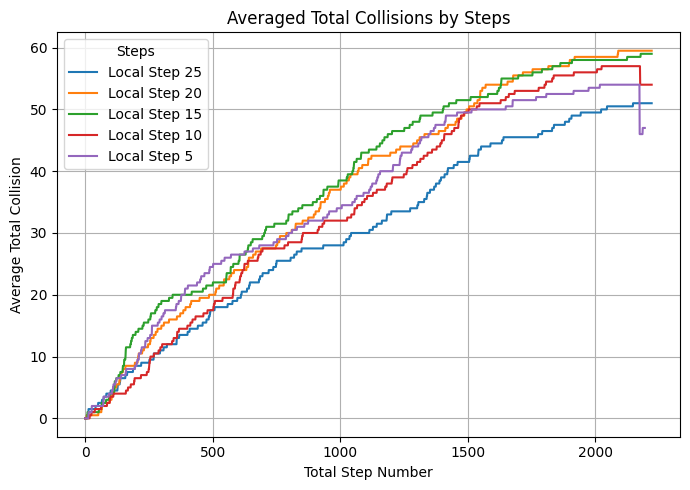

In [6]:
step_groups = {}
pattern = re.compile(r'test_local_step_(\d+).*?_seed_(\d+)|test_local_step_(\d+)')

# Iterate through filtered column names and group them by step
for col in df_filtered.columns:
    match = pattern.search(col)
    if match:
        step = int(match.group(1) or match.group(3))
        if step not in step_groups:
            step_groups[step] = []
        step_groups[step].append(col)

# Create a DataFrame to store averaged data
averaged_data = pd.DataFrame(index=df_filtered.index)

# Compute the mean of all seeds for each step
for step, columns in step_groups.items():
    averaged_data[f"Local Step {step}"] = df_filtered[columns].mean(axis=1)

# Plot the averaged data
plt.figure(figsize=(7, 5))
for col in averaged_data.columns:
    plt.plot(averaged_data.index, averaged_data[col], label=col)

# Add labels, title, and legend
plt.xlabel('Total Step Number')
plt.ylabel('Average Total Collision')
plt.title('Averaged Total Collisions by Steps')
plt.legend(title='Steps')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/hj/3fjyhjt93m7c5t7sztk1h8200000gn/T/ipykernel_49910/3469654449.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Local Step', y='Average Total Collision', data=bar_data, palette='Blues_d')


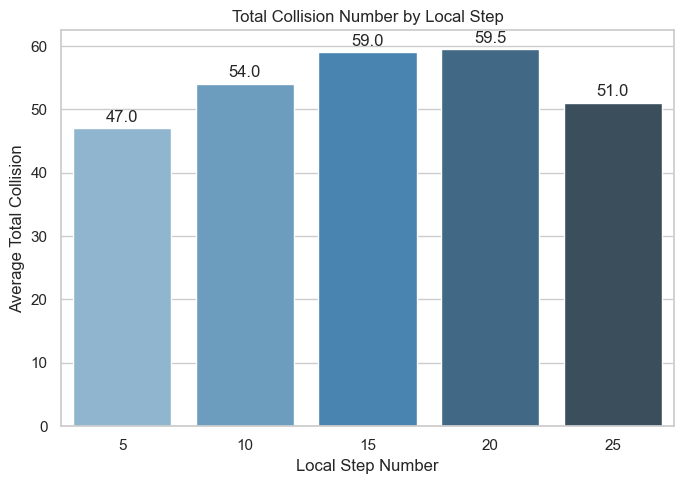

In [7]:
# Create a dictionary to store the last non-NaN value per step
last_non_nan_values = {}

for col in averaged_data.columns:
    # Extract the last non-NaN value for each step
    last_non_nan = averaged_data[col].dropna().iloc[-1]
    last_non_nan_values[col] = last_non_nan

# Convert the dictionary to a DataFrame suitable for Seaborn's bar plot
bar_data = pd.DataFrame.from_dict(last_non_nan_values, orient='index', columns=['Average Total Collision'])
bar_data.reset_index(inplace=True)
bar_data.rename(columns={'index': 'Local Step'}, inplace=True)

# Convert 'Local Step' to integer for sorting
bar_data['Local Step'] = bar_data['Local Step'].str.extract('(\d+)', expand=False).astype(int)

# Sort the DataFrame by 'Local Step' in ascending order
bar_data.sort_values(by='Local Step', inplace=True)

# Set Seaborn style for the bar plot
sns.set_theme(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(7, 5))
bar_plot = sns.barplot(x='Local Step', y='Average Total Collision', data=bar_data, palette='Blues_d')

# Add value labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),  # Format the value with 2 decimal places
                      (p.get_x() + p.get_width() / 2, p.get_height()),  # Place it above each bar
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')  # Offset vertically

# Add labels and title
plt.xlabel('Local Step Number')
plt.ylabel('Average Total Collision')
plt.title('Total Collision Number by Local Step')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


## DTS

In [8]:
df = pd.read_csv('total_dts.csv')

In [9]:
# df.columns

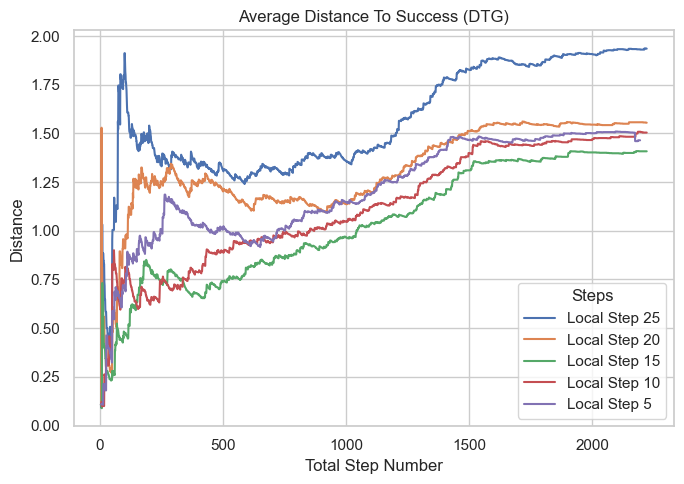

In [10]:

# Filter columns that contain only `- total_dist` and exclude `__MIN` or `__MAX`
total_dist_columns = [col for col in df.columns if 'total_dist' in col and '__' not in col]

# Create a filtered DataFrame with only the main 'total_dist' columns
df_total_dist = df[total_dist_columns]

# Use regex to group columns by step number
step_groups = {}
pattern = re.compile(r'test_local_step_(\d+).*?_seed_(\d+)|test_local_step_(\d+)')

# Group columns by step number
for col in df_total_dist.columns:
    match = pattern.search(col)
    if match:
        step = int(match.group(1) or match.group(3))
        if step not in step_groups:
            step_groups[step] = []
        step_groups[step].append(col)

# Create a DataFrame to store averaged data
averaged_data_dist = pd.DataFrame(index=df_total_dist.index)

# Compute the mean of all seeds for each step
for step, columns in step_groups.items():
    averaged_data_dist[f"Local Step {step}"] = df_total_dist[columns].mean(axis=1)

# Plot the averaged data for total_dist
plt.figure(figsize=(7, 5))
for col in averaged_data_dist.columns:
    plt.plot(averaged_data_dist.index, averaged_data_dist[col], label=col)

# Add labels, title, and legend
plt.xlabel('Total Step Number')
plt.title('Average Distance To Success (DTS)')
plt.ylabel('Distance')
plt.legend(title='Steps')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/hj/3fjyhjt93m7c5t7sztk1h8200000gn/T/ipykernel_49910/436272004.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_dist = sns.barplot(x='Local Step', y='Average Total Distance', data=bar_data_dist, palette='Blues_d')


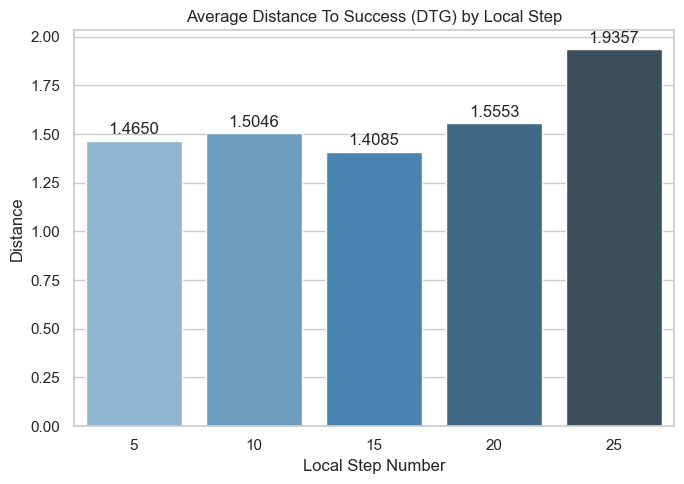

In [11]:
# Create a dictionary to store the last non-NaN value per step for `total_dist`
last_non_nan_values_dist = {}

for col in averaged_data_dist.columns:
    # Extract the last non-NaN value for each step
    last_non_nan = averaged_data_dist[col].dropna().iloc[-1]
    last_non_nan_values_dist[col] = last_non_nan

# Convert the dictionary to a DataFrame suitable for Seaborn's bar plot
bar_data_dist = pd.DataFrame.from_dict(last_non_nan_values_dist, orient='index', columns=['Average Total Distance'])
bar_data_dist.reset_index(inplace=True)
bar_data_dist.rename(columns={'index': 'Local Step'}, inplace=True)

# Convert 'Local Step' to integer for sorting
bar_data_dist['Local Step'] = bar_data_dist['Local Step'].str.extract('(\d+)', expand=False).astype(int)

# Sort the DataFrame by 'Local Step' in ascending order
bar_data_dist.sort_values(by='Local Step', inplace=True)

# Set Seaborn style for the bar plot
sns.set_theme(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(7, 5))
bar_plot_dist = sns.barplot(x='Local Step', y='Average Total Distance', data=bar_data_dist, palette='Blues_d')

# Add value labels on top of the bars
for p in bar_plot_dist.patches:
    bar_plot_dist.annotate(format(p.get_height(), '.4f'),  # Format the value with 2 decimal places
                           (p.get_x() + p.get_width() / 2, p.get_height()),  # Place it above each bar
                           ha='center', va='center', xytext=(0, 8), textcoords='offset points')  # Offset vertically

# Add labels and title
plt.xlabel('Local Step Number')
plt.title('Average Distance To Success (DTS) by Local Step')
plt.ylabel('Distance')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


## SPL

In [12]:
df = pd.read_csv('total_spl.csv')

In [13]:
# df.columns

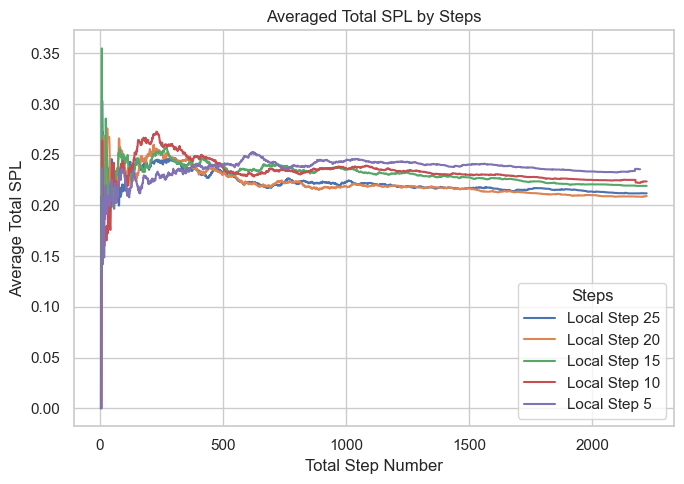

In [14]:
# Filter columns that contain only `- total_spl` and exclude `__MIN` or `__MAX`
total_spl_columns = [col for col in df.columns if 'total_spl' in col and '__' not in col]

# Create a filtered DataFrame with only the main 'total_spl' columns
df_total_spl = df[total_spl_columns]

# Use regex to group columns by step number
step_groups = {}
pattern = re.compile(r'test_local_step_(\d+).*?_seed_(\d+)|test_local_step_(\d+)')

# Group columns by step number
for col in df_total_spl.columns:
    match = pattern.search(col)
    if match:
        step = int(match.group(1) or match.group(3))
        if step not in step_groups:
            step_groups[step] = []
        step_groups[step].append(col)

# Create a DataFrame to store averaged data
averaged_data_spl = pd.DataFrame(index=df_total_spl.index)

# Compute the mean of all seeds for each step
for step, columns in step_groups.items():
    averaged_data_spl[f"Local Step {step}"] = df_total_spl[columns].mean(axis=1)

# Plot the averaged data for total_spl
plt.figure(figsize=(7, 5))
for col in averaged_data_spl.columns:
    plt.plot(averaged_data_spl.index, averaged_data_spl[col], label=col)

# Add labels, title, and legend
plt.xlabel('Total Step Number')
plt.ylabel('Average Total SPL')
plt.title('Averaged Total SPL by Steps')
plt.legend(title='Steps')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/hj/3fjyhjt93m7c5t7sztk1h8200000gn/T/ipykernel_49910/992407126.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_spl = sns.barplot(x='Local Step', y='Average Total SPL', data=bar_data_spl, palette='Blues_d')


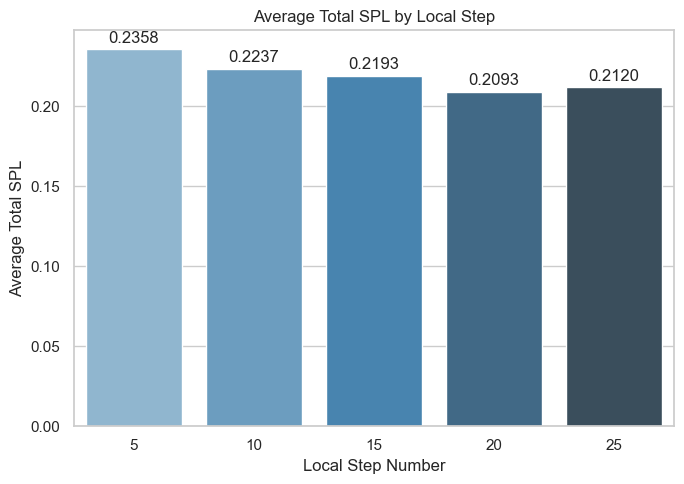

In [15]:
# Create a dictionary to store the last non-NaN value per step for `total_spl`
last_non_nan_values_spl = {}

for col in averaged_data_spl.columns:
    # Extract the last non-NaN value for each step
    last_non_nan = averaged_data_spl[col].dropna().iloc[-1]
    last_non_nan_values_spl[col] = last_non_nan

# Convert the dictionary to a DataFrame suitable for Seaborn's bar plot
bar_data_spl = pd.DataFrame.from_dict(last_non_nan_values_spl, orient='index', columns=['Average Total SPL'])
bar_data_spl.reset_index(inplace=True)
bar_data_spl.rename(columns={'index': 'Local Step'}, inplace=True)

# Extract the numeric value from 'Local Step' for sorting
bar_data_spl['Local Step'] = bar_data_spl['Local Step'].str.extract('(\d+)', expand=False).astype(int)

# Sort the DataFrame by 'Local Step' in ascending order
bar_data_spl.sort_values(by='Local Step', inplace=True)

# Set Seaborn style for the bar plot
sns.set_theme(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(7, 5))
bar_plot_spl = sns.barplot(x='Local Step', y='Average Total SPL', data=bar_data_spl, palette='Blues_d')

# Add value labels on top of the bars
for p in bar_plot_spl.patches:
    bar_plot_spl.annotate(format(p.get_height(), '.4f'),  # Format the value with 2 decimal places
                          (p.get_x() + p.get_width() / 2, p.get_height()),  # Place it above each bar
                          ha='center', va='center', xytext=(0, 8), textcoords='offset points')  # Offset vertically

# Add labels and title
plt.xlabel('Local Step Number')
plt.ylabel('Average Total SPL')
plt.title('Average Total SPL by Local Step')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

## SR

In [16]:
df = pd.read_csv('total_sr.csv')

In [17]:
# df.columns

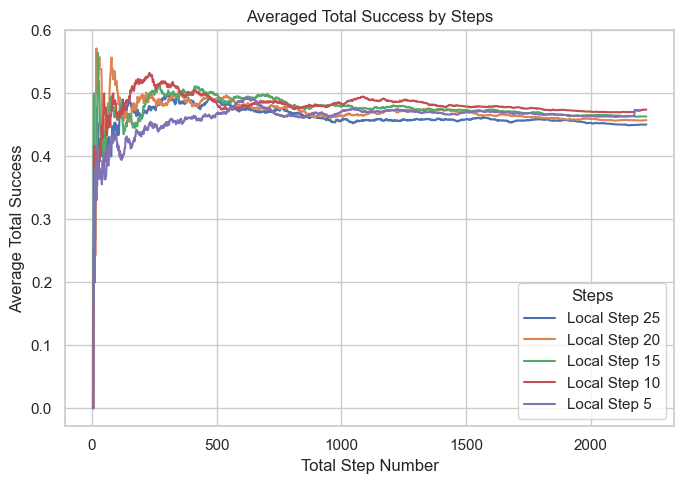

In [18]:
# Filter columns that contain only `- total_success` and exclude `__MIN` or `__MAX`
total_success_columns = [col for col in df.columns if 'total_success' in col and '__' not in col]

# Create a filtered DataFrame with only the main 'total_success' columns
df_total_success = df[total_success_columns]

# Use regex to group columns by step number
step_groups = {}
pattern = re.compile(r'test_local_step_(\d+).*?_seed_(\d+)|test_local_step_(\d+)')

# Group columns by step number
for col in df_total_success.columns:
    match = pattern.search(col)
    if match:
        step = int(match.group(1) or match.group(3))
        if step not in step_groups:
            step_groups[step] = []
        step_groups[step].append(col)

# Create a DataFrame to store averaged data
averaged_data_success = pd.DataFrame(index=df_total_success.index)

# Compute the mean of all seeds for each step
for step, columns in step_groups.items():
    averaged_data_success[f"Local Step {step}"] = df_total_success[columns].mean(axis=1)

# Plot the averaged data for total_success
plt.figure(figsize=(7, 5))
for col in averaged_data_success.columns:
    plt.plot(averaged_data_success.index, averaged_data_success[col], label=col)

# Add labels, title, and legend
plt.xlabel('Total Step Number')
plt.ylabel('Average Total Success')
plt.title('Averaged Total Success by Steps')
plt.legend(title='Steps')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/hj/3fjyhjt93m7c5t7sztk1h8200000gn/T/ipykernel_49910/3840288109.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_success = sns.barplot(x='Local Step', y='Average Total Success', data=bar_data_success, palette='Blues_d')


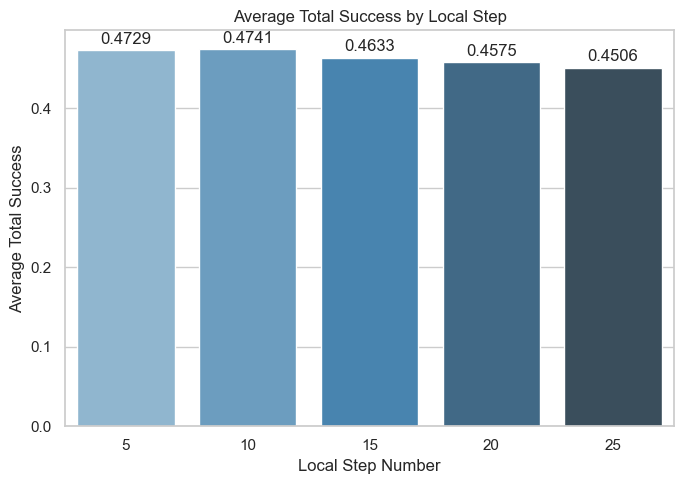

In [19]:
# Create a dictionary to store the last non-NaN value per step for `total_success`
last_non_nan_values_success = {}

for col in averaged_data_success.columns:
    # Extract the last non-NaN value for each step
    last_non_nan = averaged_data_success[col].dropna().iloc[-1]
    last_non_nan_values_success[col] = last_non_nan

# Convert the dictionary to a DataFrame suitable for Seaborn's bar plot
bar_data_success = pd.DataFrame.from_dict(last_non_nan_values_success, orient='index', columns=['Average Total Success'])
bar_data_success.reset_index(inplace=True)
bar_data_success.rename(columns={'index': 'Local Step'}, inplace=True)

# Extract the numeric value from 'Local Step' for sorting
bar_data_success['Local Step'] = bar_data_success['Local Step'].str.extract('(\d+)', expand=False).astype(int)

# Sort the DataFrame by 'Local Step' in ascending order
bar_data_success.sort_values(by='Local Step', inplace=True)

# Set Seaborn style for the bar plot
sns.set_theme(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(7, 5))
bar_plot_success = sns.barplot(x='Local Step', y='Average Total Success', data=bar_data_success, palette='Blues_d')

# Add value labels on top of the bars
for p in bar_plot_success.patches:
    bar_plot_success.annotate(format(p.get_height(), '.4f'),  # Adjust decimal places to your preference
                              (p.get_x() + p.get_width() / 2, p.get_height()),  # Place it above each bar
                              ha='center', va='center', xytext=(0, 8), textcoords='offset points')  # Offset vertically

# Add labels and title
plt.xlabel('Local Step Number')
plt.ylabel('Average Total Success')
plt.title('Average Total Success by Local Step')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

## 